# Linear Regression: Implemented Methods

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import time


#Creating the functions used for Linear Regression

'''Criando a funcao de normalização de um dataframe inteiro
    input:
        df: Dataframe
    output:
        df: Dataframe com valores normalizados
'''
def normalize_dataframe(df):
    for column in df:
        df[column] = (df[column] - min(df[column])) / ( max(df[column]) - min(df[column]) )
    return df

'''Criando a funcao de normalização de uma coluna do dataframe
    input:
        df: Coluna a ser normalizada de um dataframe
    output:
        coluna: Coluna do Dataframe normalizada
'''
def normalize_dataframe_column(df):
        return (df - min(df)) / ( max(df) - min(df) )

'''Criando funcao para executar o gradiente descendente (batch)
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
        alpha:learning rate
        iterations: numero max de iteracoes para parada
    output:
       theta: vetor de thetas atualizados
       cost_history: vetor do historico de custos ao longo do processo
'''
def stochastic_gradient_descent(X,Y,theta,alpha,iterations):
    qut_samples = Y.shape[0]
    cost_history = [0]*iterations*qut_samples
    
    for iteration in range (iterations):
        for sample in range (qut_samples):#hipotese
            h = X.iloc[sample,:].dot(theta)
            #diferenca entre hipotese e predicao
            loss = h - Y[sample]
            gradient = X.iloc[sample,:].T * loss
            #changing values of parameters 
            theta = theta - np.array([(alpha * gradient)]).T
            #New cost value
            cost = cost_function(X,Y,theta)
            cost_history[iteration*qut_samples+sample] = cost
    return theta, cost_history


'''Criando funcao para executar o gradiente descendente (estocástico)
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
        alpha:learning rate
        iterations: numero max de iteracoes para parada
        reg_lambda: constante lambda para regularização
    output:
       theta: vetor de thetas atualizados
       cost_history: vetor do historico de custos ao longo do processo
'''
def stochastic_gradient_descent_regularized(X,Y,theta,alpha,iterations, reg_lambda):
    epsulon = 0.00001
    qut_samples = Y.shape[0]
    cost_history = [0]*iterations*qut_samples
    i = 0
    
    for iteration in range (iterations):
        index_aux = iteration*qut_samples
        for sample in range (qut_samples):#hipotese
            h = X.iloc[sample,:].dot(theta)
            #diferenca entre hipotese e predicao
            loss = h - Y[sample]
            gradient = X.iloc[sample,:].T * loss
            #Gradiente descendente
            #gradient = np.array(loss * X.iloc[:,sample].T).reshape(1, theta.shape[1])
            #changing values of parameters 
            theta = theta * (1-reg_lambda/qut_samples) - np.array([(alpha * gradient)]).T
            #New cost value
            cost = cost_function(X,Y,theta)
            if(abs(float(cost_history[index_aux+sample-1]-cost)) < epsulon):
                i = index_aux+sample
                break
            cost_history[iteration*qut_samples+sample] = cost
        if (i != 0):
            break
    i = qut_samples*iterations
    return theta, cost_history[0:i], i



'''Criando a funcao de custo
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
    output:
        custo: custo da iteração
'''
def cost_function(X,Y,theta):
    qut_samples = Y.shape[0]
    h = X.dot(theta)
    cost = np.sum((h - Y)**2)/(2*qut_samples)
    return cost

'''Criando funcao para executar o gradiente descendente (batch)
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
        alpha:learning rate
        iterations: numero max de iteracoes para parada
    output:
       theta: vetor de thetas atualizados
       cost_history: vetor do historico de custos ao longo do processo
'''
def gradient_descent(X,Y,theta,alpha,iterations):
    cost_history = [0]*iterations
    qut_samples = Y.shape[0]
    epsulon = 0.00001
    
    for iteration in range (iterations):
        #hipotese
        h = X.dot(theta)
        #diferenca entre hipotese e target
        loss = np.array(h - Y).T
        #Gradiente descendente
        XLoss = X.T.dot(loss.T)
        
        gradient = XLoss/qut_samples
        #changing values of parameters
        theta = theta - (alpha * gradient)
        #New cost value
        cost = cost_function(X,Y,theta)
        if(abs(float(cost_history[iteration-1]-cost)) < epsulon):
            i = iteration
            break
        cost_history[iteration] = cost
        #print ("Iteration: %d | Cost: %f" % (iteration+1, cost))
    return theta, cost_history

'''Criando funcao para executar o gradiente descendente (batch)
    input:
        X: matriz de features
        Y: matriz de gabarito
        theta: array de pesos
        alpha:learning rate
        iterations: numero max de iteracoes para parada
        reg_lambda: constante lambda para regularização
    output:
       theta: vetor de thetas atualizados
       cost_history: vetor do historico de custos ao longo do processo
'''
def gradient_descent_regularized(X,Y,theta,alpha,iterations, reg_lambda):
    cost_history = [0]*iterations
    qut_samples = Y.shape[0]
    epsulon = 0.00001
    
    for iteration in range (iterations):
        #hipotese
        h = X.dot(theta)
        #diferenca entre hipotese e target
        loss = np.array(h - Y).T
        #Gradiente descendente
        XLoss = X.T.dot(loss.T)
        
        gradient = XLoss/qut_samples
        #changing values of parameters
        theta = theta * (1-reg_lambda/qut_samples) - (alpha * gradient)
        #New cost value
        cost = cost_function(X,Y,theta)
        if(abs(float(cost_history[iteration-1]-cost)) < epsulon):
            i = iteration
            break
        cost_history[iteration] = cost
        #print ("Iteration: %d | Cost: %f" % (iteration+1, cost))
    return theta, cost_history[0:i], i



'''
Funcao para calcular regressao linear utilizando sklearn 
    Input:
        X: matriz de features
        Y: matriz de gabarito
        alpha: learning rate
        iterations: numero de iteracoes 
    Output:
        rmse: valor de erro gerado na predicao


'''
def baseLine_GD(X,Y,alpha,iterations):
    #Y = Y.T
    #X = X.T
    reg = linear_model.LinearRegression()
    reg.fit(X,Y)
    Y_pred = reg.predict(X)
    rmse = np.sqrt(metrics.mean_squared_error(Y, Y_pred))
    return rmse

'''Criando funcao para descobrir o erro root-mean-square 
    input:
        Y: vetor gabarito
        Y_pred: vetor de predicao gerado pelo modelo
    output:
        rmse: erro gerado
'''
def rmse(Y,Y_pred):
    rmse = np.sqrt(((Y - Y_pred) ** 2).mean())
    return float(rmse)

'''Criando funcao para cencontrar valores otimos de theta, usando equacoes normais. 
    input:
        Y: vetor gabarito
        X: matriz de features
        theta: vetor inicial de pesos
    output:
        theta: novos valores para os vetor de pesos
'''
def normal_equation(X,Y,theta):
    theta_ = theta.T
   
    primeiro = X.T.dot(X)
    segundo = np.linalg.pinv(primeiro)
    terceiro = segundo.dot(X.T)
    quarto = terceiro.dot(Y)
    theta = quarto
    return theta

## Dictionaries creation for discretizing the categorical columns of the dataset

In [3]:
#Create dictionaries for discretizing the categorical columns

#cut is a dictionary that uses the semantics of cut feature to create a discrete numerical value based on an e^x function
cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

## Final version of the Dataframe. With normalization, shuffling and outlier removal

In [4]:
#Normalize and Discretize the DF
df = pd.read_csv('../data/diamonds.csv')
df = df.sample(frac=1)
df["cut"] = df["cut"].map(cut)
df["color"] = df["color"].map(color)
df["clarity"] = df["clarity"].map(clarity)
df['bias'] = 1
df['depth'] = normalize_dataframe_column(df['depth'])
df['clarity'] = normalize_dataframe_column(df['clarity'])
df['color'] = normalize_dataframe_column(df['color'])
df['cut'] = normalize_dataframe_column(df['cut'])
df['table'] = normalize_dataframe_column(df['table'])
#Volume is the combination of all three dimensions of the diamond
df['volume'] = df['x'] * df['y'] * df['z']
df['volume'] = normalize_dataframe_column(df['volume'])

#Separate the DF into Train and Test
msk = np.random.rand(len(df)) < 0.85

test_df = df[~msk]

df = df[msk]

#DF is now the training set

#Separate the Training DF into Train and Validation
msk = np.random.rand(len(df)) < 0.8

train_df = df[msk]
validation_df = df[~msk]

#Removing outliers

#There were diamonds with volume 0 or a super high value
train_df = train_df[np.abs(train_df.volume) <= (train_df.volume.mean() + 5 * train_df.volume.std())]
train_df = train_df[np.abs(train_df.volume) >= (train_df.volume.mean() -1.5 * train_df.volume.std())]
# keep only the ones that are within +5 to -1.5 standard deviations in the column 'volume'.

#There were diamonds with depth 0 or a super high value
train_df = train_df[np.abs(train_df.depth) <= (train_df.depth.mean() + 5 * train_df.depth.std())]
train_df = train_df[np.abs(train_df.depth) >= (train_df.depth.mean() - 7 * train_df.depth.std())]

#There were diamonds with table 0 or a super high value
train_df = train_df[np.abs(train_df.table) <= (train_df.table.mean() + 6 * train_df.table.std())]
train_df = train_df[np.abs(train_df.table) >= (train_df.table.mean() - 5 * train_df.table.std())]


Y_train = np.array([train_df['price']]).T
Y_validation = np.array([validation_df['price']]).T
Y_test = np.array([test_df['price']]).T

#Add the Bias and Remove the Target
train_df = train_df[['bias','carat', 'cut', 'color','clarity','depth','table','volume']]
validation_df = validation_df[['bias','carat', 'cut', 'color','clarity','depth','table','volume']]
test_df = test_df[['bias','carat', 'cut', 'color','clarity','depth','table','volume']]

theta = np.ones((8,1))

## Executions of all implementations with the final dataset for RMSE and Time Performance Comparison

### Batch Gradient Descent and Normal Equation Regression

RMSE error Batch GD:  1210.1778228700528
RMSE error Norm:  1892.3869532304695


<function matplotlib.pyplot.show(*args, **kw)>

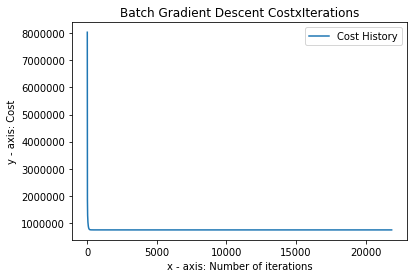

In [4]:
alpha = 0.5
iterations = 100000
reg_lambda = 10

#Batch Gradient Descent
start_time_custom = time.time()
newTheta,cost_history, iterations_batch = gradient_descent_regularized(train_df,Y_train,theta, alpha, iterations, reg_lambda)
Y_pred = test_df.dot(newTheta)
batch_gd_rmse = rmse(Y_test,Y_pred)
batch_gd_time = time.time() - start_time_custom


#Normal Distribution
start_time_custom = time.time()
newTheta_norm = normal_equation(train_df,Y_train,theta)
Y_pred_norm = test_df.dot(newTheta_norm)
rmse_norm = rmse(Y_test,Y_pred_norm)
custom_normal_time = time.time() - start_time_custom

print("RMSE error Batch GD: ",batch_gd_rmse)
print("RMSE error Norm: ", rmse_norm)

#Ploting the data
plt.plot(np.arange(iterations_batch), cost_history, label = "Cost History")

# naming the x axis
plt.xlabel('x - axis: Number of iterations')
# naming the y axis
plt.ylabel('y - axis: Cost')
plt.legend()
 
# giving a title to my graph
plt.title('Batch Gradient Descent CostxIterations')
plt.show

### Stochastic Gradient Descent (Custom Implementation)

RMSE error:  2566.9607941455893


<function matplotlib.pyplot.show(*args, **kw)>

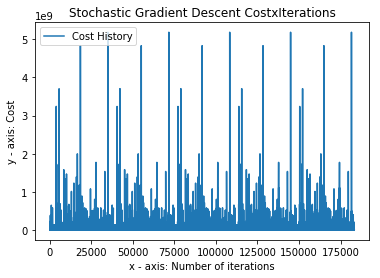

In [54]:
alpha = 0.5
iterations = 5
reg_lambda = 10

#Stochastic Gradient Descent
start_time_custom = time.time()
newTheta,cost_history, iterations_stochastic = stochastic_gradient_descent_regularized(train_df,Y_train,theta, alpha, iterations, reg_lambda)
Y_pred = validation_df.dot(newTheta)
custom_stochastic_gd_rmse = rmse(Y_validation,Y_pred)
custom_stochastic_gd_time = time.time() - start_time_custom

print("RMSE error: ",custom_stochastic_gd_rmse)

#Ploting the data
plt.plot(np.arange(iterations_stochastic), cost_history, label = "Cost History")

# naming the x axis
plt.xlabel('x - axis: Number of iterations')
# naming the y axis
plt.ylabel('y - axis: Cost')
plt.legend()
 
# giving a title to my graph
plt.title('Stochastic Gradient Descent CostxIterations')
plt.show

### Stochastic Gradient Descent (Scikit Implementation)

In [ ]:
#Scikit SGD
start_time_custom = time.time()
clf = SGDClassifier(loss="squared_loss", eta0=0.001, learning_rate='constant')
clf.fit(train_df, Y_train)
Y_pred = clf.predict(test_df)
print(Y_pred.shape)
print(Y_test.shape)
scikit_stochastic_gd_rmse = rmse(Y_test,Y_pred)
scikit_stochastic_gd_time = time.time() - start_time_custom

print("RMSE error: ", scikit_stochastic_gd_rmse)

/home/leomelo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/leomelo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Time Comparisons

In [11]:
print("Batch Gradient Descent Time (",iterations_batch, " iterations): ", batch_gd_time)
#print("Custom Stochastic Gradient Descent Time (",iterations_stochastic, " iterations): ", custom_stochastic_gd_time)
#print("Scikit Stochastic Gradient Descent Time (5 iteration): ", scikit_stochastic_gd_time)
print("Custom Normal Equation Time: ", custom_normal_time)

Batch Gradient Descent Time ( 21875  iterations):  120.65177941322327
Custom Normal Equation Time:  0.005494356155395508


In [5]:
#Normal Distribution
start_time_custom = time.time()
newTheta_norm = normal_equation(train_df,Y_train,theta)
Y_pred_norm = test_df.dot(newTheta_norm)
rmse_norm = rmse(Y_test,Y_pred_norm)
custom_normal_time = time.time() - start_time_custom

print("RMSE error Batch GD: ",batch_gd_rmse)
print("RMSE error Norm: ", rmse_norm)

NameError: name 'batch_gd_rmse' is not defined

In [58]:
#iterations_batch_history = [0]*6
#iterations_stochastic_history = [0]*6
#alpha_history = [0]*6
#counter = 0
#print(iterations_stochastic)
print(iterations_batch_history)

[51523, 40892, 31954, 26753, 24872, 22077]


In [57]:
iterations_batch_history[counter] = int(iterations_batch)
iterations_stochastic_history[counter] = int(iterations_stochastic)
alpha_history[counter] = alpha
counter = counter + 1